In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
serp_columns = ["time","IP","seqno","pkt","tx","MIsent","MIrecv","RSsent","RSrecv","hop_cnt","dis","dio","dao","rank"]
def load_file(filename):
    d = pd.read_csv(filename)#,header=None)
    d.columns = serp_columns
    d.time -= d.time.min()
    d.time = pd.to_datetime(d.time,unit='s')
    d = d.set_index('time')
    d['retries'] = d.tx - d.pkt
    numbercols = ['seqno','pkt','tx','MIsent','MIrecv','RSsent','RSrecv']
    d[numbercols] = d[numbercols].astype(str).replace('-','0').astype(int)
    #d = d.resample('10s',how='sum')
    d = d.fillna(0)
    return d

In [3]:
%cp /home/gabe/log.csv rpl-8nodes-single-hop.csv

In [8]:
#df = load_file('3hop-8nodes-single-hop.csv')
df = load_file('rpl-8nodes-single-hop.csv')
print df.IP.unique()

['2001:470:83ae:2:212:6d02:0:4043' '2001:470:83ae:2:212:6d02:0:4042'
 '2001:470:83ae:2:212:6d02:0:4034' '2001:470:83ae:2:212:6d02:0:4041'
 '2001:470:83ae:2:212:6d02:0:4044' '2001:470:83ae:2:212:6d02:0:4040'
 '2001:470:83ae:2:212:6d02:0:3005' '2001:470:83ae:2:212:6d02:0:4013'
 '2001:470:83ae:2:212:6d02:0:3041']


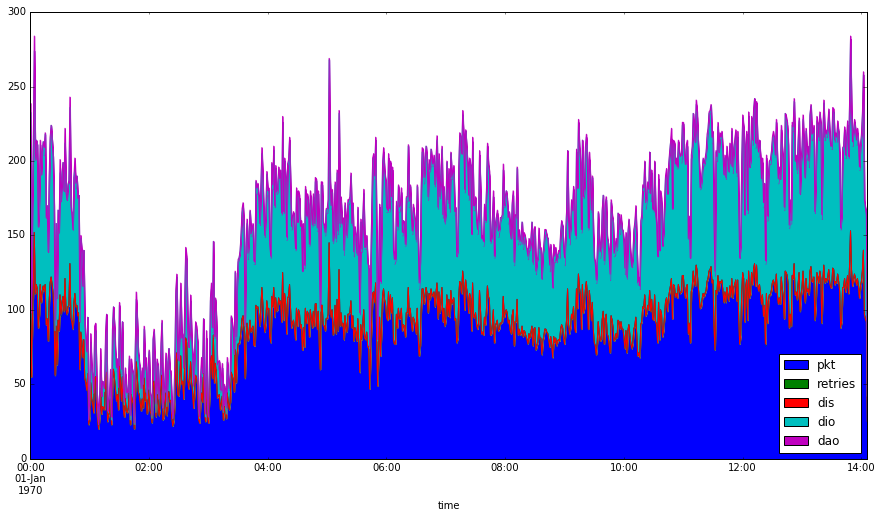

In [11]:
df.resample('60s').sum()[['pkt','retries','dis','dio','dao']].plot(kind='area',style='-',figsize=(15,8))

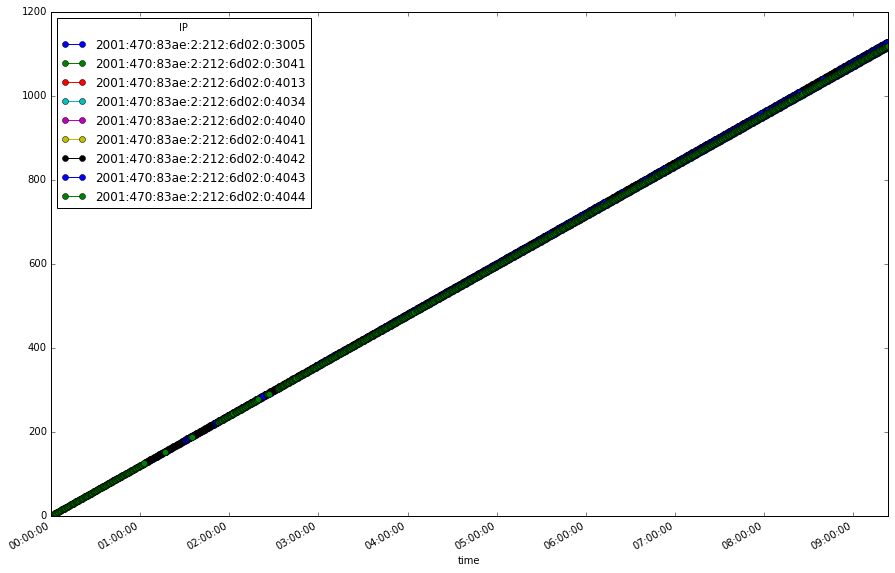

In [7]:
dfp = df.pivot(columns='IP',values='seqno')
dfp.plot(kind='line',style='-o',figsize=(15,10))